In [169]:
import smopy

In [ ]:
####### check changes

In [1]:
import pandas as pd

df_outcomes = pd.read_csv('/Users/riaz/Finecast/Task_Implementation/crimeClassifier/data/02_intermediate/all_outcomes/all_outcomes.csv')
df_streets = pd.read_csv ('/Users/riaz/Finecast/Task_Implementation/crimeClassifier/data/02_intermediate/all_street/all_street.csv')
#df_outcomes.head(10)
df_stop_search = pd.read_csv('/Users/riaz/Finecast/Task_Implementation/crimeClassifier/data/02_intermediate/all_stop_search/all_stopSearch.csv')

In [236]:
df_outcomes.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,aa36cff6a311dc3781080161311195c51a0e21d0ab8394...,2020-01,Suffolk Constabulary,Suffolk Constabulary,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
1,63630c5dcef2a5cd6cbe2d595d56744cb5148d8b34d392...,2020-01,Suffolk Constabulary,Suffolk Constabulary,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
2,3e3982fe4d6d4d51f33de2ace9e30046134a39a3319fee...,2020-01,Suffolk Constabulary,Suffolk Constabulary,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
3,fb4768c340f7c75a203ce04a128bf4d8f9c658825f6568...,2020-01,Suffolk Constabulary,Suffolk Constabulary,NaN,NaN,No location,NaN,NaN,Suspect charged
4,4d74df4720b0039a01beb98822c2dbdf1be0208dc8170d...,2020-01,Suffolk Constabulary,Suffolk Constabulary,NaN,NaN,No location,NaN,NaN,Offender given a caution


In [242]:
df_outcomes.iloc[:, 9].unique()

array(['Investigation complete; no suspect identified', 'Suspect charged',
       'Offender given a caution', 'Unable to prosecute suspect',
       'Offender given a drugs possession warning',
       'Suspect charged as part of another case',
       'Formal action is not in the public interest', 'Local resolution',
       'Further action is not in the public interest',
       'Action to be taken by another organisation',
       'Offender given penalty notice',
       'Further investigation is not in the public interest',
       'Offender sent to prison', 'Offender fined',
       'Defendant found not guilty', 'Offender given community sentence',
       'Court case unable to proceed',
       'Offender given suspended prison sentence',
       'Offender given conditional discharge',
       'Offender otherwise dealt with', 'Defendant sent to Crown Court',
       'Offender ordered to pay compensation',
       'Offender given absolute discharge',
       'Offender deprived of property'], dtype

In [262]:
df_merge_l = pd.merge(df_streets,df_outcomes[['Crime ID','Outcome type']],on='Crime ID', how='left')

In [220]:
df_merge_l.head()

,Crime_ID,Month,Reported_by,Falls_within,Longitude,Latitude,Location,LSOA_code,LSOA_name,Crime_type,Last_outcome_category,Context,Outcome_type
Month,,,,,,,,,,,,,
2020-01-01,c7000c41002f19263d4adec66b911f1c3f5e7eeb1302a3...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.570572,53.607792,On or near Park/Open Space,E01007418,Barnsley 016A,Other theft,Status update unavailable,NaN,NaN
2020-01-01,b8bc1b6cf423a9431734982fffb11f803cf82140702cc7...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.670108,53.553629,On or near Huddersfield Road,E01007426,Barnsley 027D,Robbery,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
2020-01-01,8c69cefea36edafe5fa3f992ccc31d3cfd0c9af9a81429...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Bicycle theft,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
2020-01-01,7236a8fb307214df61ca7a9b93bd309c0524f9bee58d89...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.882746,53.933807,On or near Cocking Lane,E01010646,Bradford 001A,Burglary,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
2020-01-01,92803cebdfde14ad870899c45c6bee398331f33a053bf1...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.881467,53.944510,On or near Kilners Croft,E01010646,Bradford 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified


In [218]:
df_merge_l.Reported_by.nunique()

45

In [136]:
df_merge_l['Month'] = pd.to_datetime(df_merge_l['Month'],format = '%Y-%m',errors='coerce')
df_merge_l.index = df_merge_l['Month']

In [137]:
df_merge_l.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Outcome type
Month,,,,,,,,,,,,,
2020-01-01,c7000c41002f19263d4adec66b911f1c3f5e7eeb1302a3...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.570572,53.607792,On or near Park/Open Space,E01007418,Barnsley 016A,Other theft,Status update unavailable,NaN,NaN
2020-01-01,b8bc1b6cf423a9431734982fffb11f803cf82140702cc7...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.670108,53.553629,On or near Huddersfield Road,E01007426,Barnsley 027D,Robbery,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
2020-01-01,8c69cefea36edafe5fa3f992ccc31d3cfd0c9af9a81429...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Bicycle theft,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
2020-01-01,7236a8fb307214df61ca7a9b93bd309c0524f9bee58d89...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.882746,53.933807,On or near Cocking Lane,E01010646,Bradford 001A,Burglary,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
2020-01-01,92803cebdfde14ad870899c45c6bee398331f33a053bf1...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.881467,53.944510,On or near Kilners Croft,E01010646,Bradford 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified


In [189]:
df_merge_l.sort_values("LSOA_code")

KeyboardInterrupt: 

In [224]:
df_merge_l.shape

(19900039, 13)

In [153]:
#dataset = df_merge_l
#dataset.head()
dataset.columns

Index(['Crime_ID', 'Month', 'Reported_by', 'Falls_within', 'Longitude',
       'Latitude', 'Location', 'LSOA_code', 'LSOA_name', 'Crime_type',
       'Last_outcome_category', 'Context', 'Outcome_type'],
      dtype='object')

In [152]:
dict_rename = {'Crime ID': 'Crime_ID',
        'Reported by': 'Reported_by',
        'Falls within': 'Falls_within',
          'LSOA code': 'LSOA_code',
               'LSOA name': 'LSOA_name',
              'Crime type': 'Crime_type',
              'Last outcome category': 'Last_outcome_category',
              'Outcome type':'Outcome_type'}

dataset.rename(columns=dict_rename,
          inplace=True)

In [163]:
dataset.isnull().sum()

#dataset = dataset[['']]

Crime_ID       4403463
Month                0
Reported_by          0
Longitude            0
Latitude             0
Location             0
LSOA_code            0
LSOA_name            0
Crime_type           0
dtype: int64

In [156]:
dataset = dataset[['Crime_ID', 'Month', 'Reported_by', 'Longitude', 'Latitude', 'Location', 'LSOA_code', 'LSOA_name', 'Crime_type']]

In [162]:
#dataset = dataset[dataset['Longitude', 'Latitude'].notnan()]
dataset = dataset.dropna(subset=['Longitude', 'Latitude','LSOA_code','LSOA_name'])

In [172]:
dataset.shape

(19029867, 11)

In [173]:
from sklearn.datasets import fetch_species_distributions
data = fetch_species_distributions()

In [182]:
# Basic Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from datetime import timedelta
# Mapping
import geopandas
import geopy
from geopy.geocoders import Nominatim
import folium
from geopy.extra.rate_limiter import RateLimiter
from folium import plugins
from folium.plugins import MarkerCluster
# Statistical OLS Regression Analysis
%matplotlib inline
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
#Scipy sklearn Predictions
from sklearn.ensemble import GradientBoostingRegressor

In [187]:
# Mark events with names on map
m = folium.Map([53.607792,-1.570572], zoom_start=14)
for index, row in dataset.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=3,
                        popup=row['Crime_type'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

KeyError: 'latitude'

In [185]:
folium.Map([53.607792,-1.570572], zoom_start=14)

#-1.570572	53.607792

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import fetch_species_distributions
from sklearn.neighbors import KernelDensity

# if basemap is available, we'll use it.
# otherwise, we'll improvise later...
try:
    from mpl_toolkits.basemap import Basemap

    basemap = True
except ImportError:
    basemap = False


def construct_grids(batch):
    """Construct the map grid from the batch object

    Parameters
    ----------
    batch : Batch object
        The object returned by :func:`fetch_species_distributions`

    Returns
    -------
    (xgrid, ygrid) : 1-D arrays
        The grid corresponding to the values in batch.coverages
    """
    # x,y coordinates for corner cells
    xmin = batch.x_left_lower_corner + batch.grid_size
    xmax = xmin + (batch.Nx * batch.grid_size)
    ymin = batch.y_left_lower_corner + batch.grid_size
    ymax = ymin + (batch.Ny * batch.grid_size)

    # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, batch.grid_size)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, batch.grid_size)

    return (xgrid, ygrid)


# Get matrices/arrays of species IDs and locations
data = fetch_species_distributions()
species_names = ["Bradypus Variegatus", "Microryzomys Minutus"]

Xtrain = np.vstack([data["train"]["dd lat"], data["train"]["dd long"]]).T
ytrain = np.array(
    [d.decode("ascii").startswith("micro") for d in data["train"]["species"]],
    dtype="int",
)
Xtrain *= np.pi / 180.0  # Convert lat/long to radians

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()

xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.0

# Plot map of South America with distributions of each species
fig = plt.figure()
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

for i in range(2):
    plt.subplot(1, 2, i + 1)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(
        bandwidth=0.04, metric="haversine", kernel="gaussian", algorithm="ball_tree"
    )
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999, dtype="int")
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

    if basemap:
        print(" - plot coastlines using basemap")
        m = Basemap(
            projection="cyl",
            llcrnrlat=Y.min(),
            urcrnrlat=Y.max(),
            llcrnrlon=X.min(),
            urcrnrlon=X.max(),
            resolution="c",
        )
        m.drawcoastlines()
        m.drawcountries()
    else:
        print(" - plot coastlines from coverage")
        plt.contour(
            X, Y, land_reference, levels=[-9998], colors="k", linestyles="solid"
        )
        plt.xticks([])
        plt.yticks([])

    plt.title(species_names[i])

plt.show()

In [165]:
resX = 200;
resY = 200;

#identify the x,y edges of the data
x_max = dataset['Latitude'].max()
x_min = dataset['Latitude'].min()
y_max = dataset['Longitude'].max()
y_min = dataset['Longitude'].min()

xCoordinate = dataset['Latitude']
yCoordinate = dataset['Longitude']

#distances along x and y axis
rangeX = x_max - x_min
rangeY = y_max - y_min

#linear transformations
kX = (resX-1)/rangeX
cX = x_min*kX -1
newX = round(kX * xCoordinate - cX)
kY = (resY-1)/rangeY
cY = y_min*kY -1
newY = round(kY * yCoordinate - cY)

newX = newX.astype(int)
newY = newY.astype(int)

dataset['New_X_Coor'] = newX
dataset['New_Y_Coor'] = newY

/Users/riaz/opt/anaconda3/envs/finecast-environment/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/riaz/opt/anaconda3/envs/finecast-environment/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [166]:
#make frequency matrix for heat map generation
count  = np.zeros((resX, resY))
for i in range (0,len(newX)):
    x = newX[i] -1
    y = newY[i] -1
    count[x][y] = count[x][y] + 1

In [170]:
smopy.TILE_SERVER = "http://tile.basemaps.cartocdn.com/light_all/{z}/{x}/{y}@2x.png"
#smopy.TILE_SIZE = 512
latMax = dataset['Latitude'].max()
latMin = dataset['Latitude'].min()
lonMax = dataset['Longitude'].max()
lonMin = dataset['Longitude'].min()
map = smopy.Map((latMin, lonMin, latMax, lonMax))

Lowered zoom level to keep map size reasonable. (z = 6)


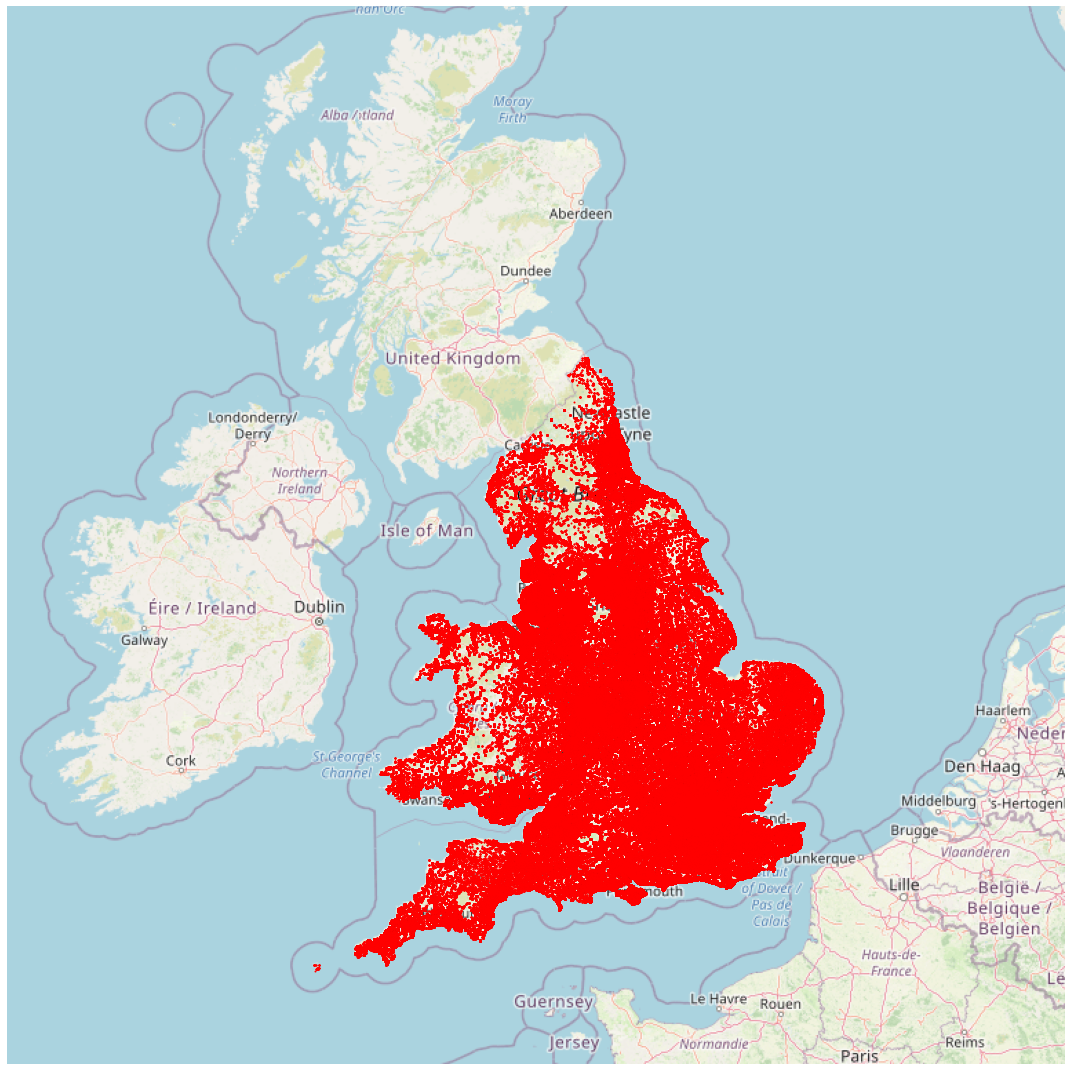

In [171]:
x, y = map.to_pixels(dataset['Latitude'], dataset['Longitude'])
ax = map.show_mpl(figsize=(15, 15))
ax.plot(x, y, 'or', ms=1, mew=1);

In [245]:
dataset.head()

,Crime_ID,Month,Reported_by,Longitude,Latitude,Location,LSOA_code,LSOA_name,Crime_type,New_X_Coor,New_Y_Coor
Month,,,,,,,,,,,
2020-01-01,c7000c41002f19263d4adec66b911f1c3f5e7eeb1302a3...,2020-01-01,West Yorkshire Police,-1.570572,53.607792,On or near Park/Open Space,E01007418,Barnsley 016A,Other theft,126,118
2020-01-01,b8bc1b6cf423a9431734982fffb11f803cf82140702cc7...,2020-01-01,West Yorkshire Police,-1.670108,53.553629,On or near Huddersfield Road,E01007426,Barnsley 027D,Robbery,125,116
2020-01-01,8c69cefea36edafe5fa3f992ccc31d3cfd0c9af9a81429...,2020-01-01,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Bicycle theft,138,111
2020-01-01,7236a8fb307214df61ca7a9b93bd309c0524f9bee58d89...,2020-01-01,West Yorkshire Police,-1.882746,53.933807,On or near Cocking Lane,E01010646,Bradford 001A,Burglary,137,111
2020-01-01,92803cebdfde14ad870899c45c6bee398331f33a053bf1...,2020-01-01,West Yorkshire Police,-1.881467,53.944510,On or near Kilners Croft,E01010646,Bradford 001A,Criminal damage and arson,138,111


In [246]:
import datashader as ds, pandas as pd, colorcet
import datashader.transfer_functions as tf
#df  = pd.read_csv('census.csv')
cvs = ds.Canvas(plot_width=350, plot_height=500)
agg = cvs.points(dataset, 'Longitude', 'Latitude')
img = ds.tf.shade(agg, cmap=colorcet.fire, how='log')


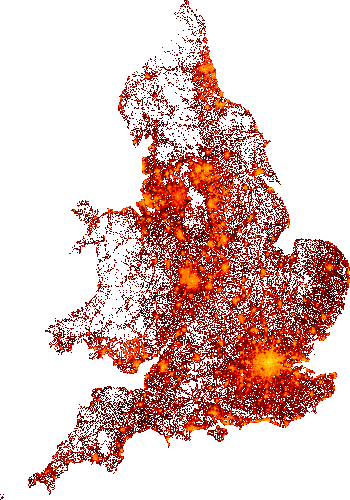

In [247]:
img

In [250]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

df = data


In [150]:
newY.dtypes

dtype('float64')

In [263]:
df_merge_l.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Outcome type
0,c7000c41002f19263d4adec66b911f1c3f5e7eeb1302a3...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.570572,53.607792,On or near Park/Open Space,E01007418,Barnsley 016A,Other theft,Status update unavailable,NaN,NaN
1,b8bc1b6cf423a9431734982fffb11f803cf82140702cc7...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.670108,53.553629,On or near Huddersfield Road,E01007426,Barnsley 027D,Robbery,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
2,8c69cefea36edafe5fa3f992ccc31d3cfd0c9af9a81429...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Bicycle theft,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
3,7236a8fb307214df61ca7a9b93bd309c0524f9bee58d89...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.882746,53.933807,On or near Cocking Lane,E01010646,Bradford 001A,Burglary,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
4,92803cebdfde14ad870899c45c6bee398331f33a053bf1...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.881467,53.944510,On or near Kilners Croft,E01010646,Bradford 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified


In [273]:
df_freq_Month_CrimeType_LSOA.head()

Count
Month   Crime_type            LSOA_code       
2019-02 Theft from the person E01004734    486
2019-03 Theft from the person E01004734    471
                              E01004763    424
2019-04 Theft from the person E01004734    400
                              E01004763    376

In [274]:
df_freq_Month_CrimeType_LSOA.columns

Index(['Count'], dtype='object')

In [36]:
print(df_merge_l['LSOA code'].nunique())

34749


In [7]:
occur = df_merge_l.groupby(['Crime type']).size().sort_values(ascending=False)

In [26]:
display(occur)

Crime type
Violence and sexual offences    6131760
Anti-social behaviour           4475066
Criminal damage and arson       1587656
Public order                    1464656
Other theft                     1317408
Vehicle crime                   1177800
Burglary                         981833
Shoplifting                      946545
Drugs                            608147
Other crime                      331893
Theft from the person            252497
Bicycle theft                    246209
Robbery                          233225
Possession of weapons            145344
dtype: int64

Text(0.5, 0, 'Number of crimes in (in millions)')

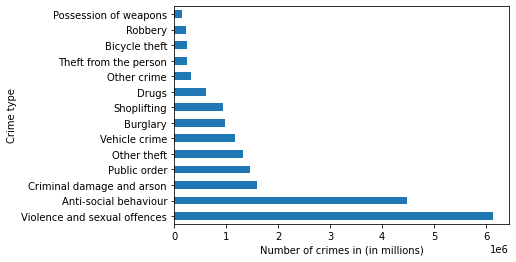

In [213]:
occur.plot(kind='barh').set_xlabel('Number of crimes in (in millions)')

In [12]:
df_merge_l.isna().sum()

Crime ID                  4618832
Month                           0
Reported by                     0
Falls within                    0
Longitude                  383485
Latitude                   383485
Location                        0
LSOA code                  870172
LSOA name                  870172
Crime type                      0
Last outcome category     4913952
Context                  19900039
Outcome type              7201414
dtype: int64

In [49]:
df_merge_l.columns

Index(['Crime_ID', 'Month', 'Reported_by', 'Falls_within', 'Longitude',
       'Latitude', 'Location', 'LSOA_code', 'LSOA_name', 'Crime_type',
       'Last_outcome_category', 'Context', 'Outcome_type'],
      dtype='object')

In [264]:
dict_rename = {'Crime ID': 'Crime_ID',
        'Reported by': 'Reported_by',
        'Falls within': 'Falls_within',
          'LSOA code': 'LSOA_code',
               'LSOA name': 'LSOA_name',
              'Crime type': 'Crime_type',
              'Last outcome category': 'Last_outcome_category',
              'Outcome type':'Outcome_type'}

df_merge_l.rename(columns=dict_rename,
          inplace=True)

In [265]:
df_merge_l = df_merge_l[['Crime_ID', 'Month', 'Reported_by', 'Longitude',
       'Latitude', 'Location', 'LSOA_code', 'LSOA_name', 'Crime_type']]

In [228]:
df_merge_l.head()

,Crime_ID,Month,Reported_by,Longitude,Latitude,Location,LSOA_code,LSOA_name,Crime_type
Month,,,,,,,,,
2020-01-01,c7000c41002f19263d4adec66b911f1c3f5e7eeb1302a3...,2020-01-01,West Yorkshire Police,-1.570572,53.607792,On or near Park/Open Space,E01007418,Barnsley 016A,Other theft
2020-01-01,b8bc1b6cf423a9431734982fffb11f803cf82140702cc7...,2020-01-01,West Yorkshire Police,-1.670108,53.553629,On or near Huddersfield Road,E01007426,Barnsley 027D,Robbery
2020-01-01,8c69cefea36edafe5fa3f992ccc31d3cfd0c9af9a81429...,2020-01-01,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Bicycle theft
2020-01-01,7236a8fb307214df61ca7a9b93bd309c0524f9bee58d89...,2020-01-01,West Yorkshire Police,-1.882746,53.933807,On or near Cocking Lane,E01010646,Bradford 001A,Burglary
2020-01-01,92803cebdfde14ad870899c45c6bee398331f33a053bf1...,2020-01-01,West Yorkshire Police,-1.881467,53.944510,On or near Kilners Croft,E01010646,Bradford 001A,Criminal damage and arson


In [9]:
#df_merged = pd.merge(df_outcomes, df_streets, on='Symbol', how='inner')

df_streets.head(10)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,c7000c41002f19263d4adec66b911f1c3f5e7eeb1302a3...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.570572,53.607792,On or near Park/Open Space,E01007418,Barnsley 016A,Other theft,Status update unavailable,NaN
1,b8bc1b6cf423a9431734982fffb11f803cf82140702cc7...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.670108,53.553629,On or near Huddersfield Road,E01007426,Barnsley 027D,Robbery,Investigation complete; no suspect identified,NaN
2,8c69cefea36edafe5fa3f992ccc31d3cfd0c9af9a81429...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Bicycle theft,Investigation complete; no suspect identified,NaN
3,7236a8fb307214df61ca7a9b93bd309c0524f9bee58d89...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.882746,53.933807,On or near Cocking Lane,E01010646,Bradford 001A,Burglary,Investigation complete; no suspect identified,NaN
4,92803cebdfde14ad870899c45c6bee398331f33a053bf1...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.881467,53.944510,On or near Kilners Croft,E01010646,Bradford 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
5,930c29edbf799c97c2272515cefebc7226e408edbc3dec...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.882153,53.944205,On or near Parking Area,E01010646,Bradford 001A,Criminal damage and arson,Status update unavailable,NaN
6,363a9f6d5e082d17e9dbdf3a05f969cc701fb4728a5a1d...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
7,f3ec4987b56463864e0f062d0b21989d5b2ad385986bc3...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
8,b654782b72ef41536a80f76b30e09b6ad27bd02e4da464...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.882481,53.924936,On or near Moorside Lane,E01010646,Bradford 001A,Other theft,Status update unavailable,NaN
9,5d29ad94964e1939ebe7232546727544c792087db7d0f0...,2020-01,West Yorkshire Police,West Yorkshire Police,-1.882746,53.933807,On or near Cocking Lane,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect,NaN


In [266]:
# an instance represents 
#the frequency of crime for a particular month, LSOA code and crime type.

freq_Month_CrimeType_LSOA = df_merge_l.groupby(["Month", "Crime_type", "LSOA_code"]).size()

In [267]:
freq_Month_CrimeType_LSOA.columns

AttributeError: 'Series' object has no attribute 'columns'

In [51]:
freq_Month_CrimeType_LSOA.head(5)

Month    Crime_type             LSOA_code
2018-12  Anti-social behaviour  E01000001     2
                                E01000002     5
                                E01000005    14
                                E01000006     2
                                E01000007     6
dtype: int64

In [268]:
freq_Month_CrimeType_LSOA1 = df_merge_l.value_counts(["Month", "Crime_type", "LSOA_code"])

In [254]:
df_merge_l.head()

,Crime_ID,Month,Reported_by,Longitude,Latitude,Location,LSOA_code,LSOA_name,Crime_type
Month,,,,,,,,,
2020-01-01,c7000c41002f19263d4adec66b911f1c3f5e7eeb1302a3...,2020-01-01,West Yorkshire Police,-1.570572,53.607792,On or near Park/Open Space,E01007418,Barnsley 016A,Other theft
2020-01-01,b8bc1b6cf423a9431734982fffb11f803cf82140702cc7...,2020-01-01,West Yorkshire Police,-1.670108,53.553629,On or near Huddersfield Road,E01007426,Barnsley 027D,Robbery
2020-01-01,8c69cefea36edafe5fa3f992ccc31d3cfd0c9af9a81429...,2020-01-01,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Bicycle theft
2020-01-01,7236a8fb307214df61ca7a9b93bd309c0524f9bee58d89...,2020-01-01,West Yorkshire Police,-1.882746,53.933807,On or near Cocking Lane,E01010646,Bradford 001A,Burglary
2020-01-01,92803cebdfde14ad870899c45c6bee398331f33a053bf1...,2020-01-01,West Yorkshire Police,-1.881467,53.944510,On or near Kilners Croft,E01010646,Bradford 001A,Criminal damage and arson


In [283]:
freq_Month_CrimeType_LSOA1.head(5)

Month    Crime_type             LSOA_code
2019-02  Theft from the person  E01004734    486
2019-03  Theft from the person  E01004734    471
                                E01004763    424
2019-04  Theft from the person  E01004734    400
                                E01004763    376
dtype: int64

In [281]:
df_freq_Month_CrimeType_LSOA = freq_Month_CrimeType_LSOA1.to_frame()


In [282]:
df_freq_Month_CrimeType_LSOA.rename(columns = {0:'Count'}, inplace = True).reset_index(inplace=True)

AttributeError: 'NoneType' object has no attribute 'reset_index'

In [271]:
df_freq_Month_CrimeType_LSOA.rename(columns = {0:'Count'}, inplace = True)

In [272]:
df_freq_Month_CrimeType_LSOA.head()

Count
Month   Crime_type            LSOA_code       
2019-02 Theft from the person E01004734    486
2019-03 Theft from the person E01004734    471
                              E01004763    424
2019-04 Theft from the person E01004734    400
                              E01004763    376

In [196]:
#print(df_freq_Month_CrimeType_LSOA['LSOA_code'].value_counts())
df_freq_Month_CrimeType_LSOA.loc[df_freq_Month_CrimeType_LSOA['LSOA_code'] == 'E01032739']


,Crime_type,LSOA_code,Count
Month,,,
2019-04-01,Other theft,E01032739,261
2019-06-01,Other theft,E01032739,255
2020-02-01,Other theft,E01032739,233
2019-05-01,Other theft,E01032739,216
2019-12-01,Other theft,E01032739,214
...,...,...,...
2020-02-01,Possession of weapons,E01032739,1
2019-08-01,Possession of weapons,E01032739,1
2021-01-01,Other crime,E01032739,1


In [234]:
import numpy as np
import longtail

# generate random values from heavy tailed distribution (let's take Laplace)
X = np.random.laplace(size=10000)
X = X[X>0]  # take only right half of the distribution

# get best fit of half normal distribution to our data:
params = longtail.fit_distributions(X, distributions=['halfnorm'])

# visualize X and best fit:
longtail.plot(X, params=params)

ModuleNotFoundError: No module named 'longtail'

In [107]:
df_freq_Month_CrimeType_LSOA = df_freq_Month_CrimeType_LSOA.set_index('Month')

In [115]:
df_freq_Month_CrimeType_LSOA.sort_index()
#df_freq_Month_CrimeType_LSOA.head(50)

,Crime_type,LSOA_code,Count
Month,,,
2018-12,Anti-social behaviour,E01012314,5
2018-12,Vehicle crime,E01020003,1
2018-12,Vehicle crime,E01020002,1
2018-12,Vehicle crime,E01020000,1
2018-12,Vehicle crime,E01019996,1
...,...,...,...
2021-11,Theft from the person,E01022664,2
2021-11,Shoplifting,E01033704,2
2021-11,Shoplifting,E01029241,2


In [126]:
df_freq_Month_CrimeType_LSOA.index = pd.to_datetime(df_freq_Month_CrimeType_LSOA.index)

In [127]:

df_freq_Month_CrimeType_LSOA.index.to_frame().dtypes

Month    datetime64[ns]
dtype: object

In [109]:
print (df_freq_Month_CrimeType_LSOA.index.min())
print (df_freq_Month_CrimeType_LSOA.index.max())

2018-12
2021-11


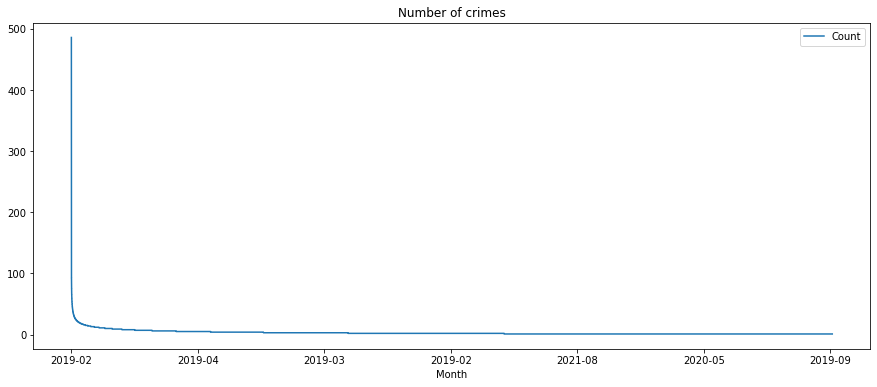

In [118]:
# Plot time series
# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 6))
df_freq_Month_CrimeType_LSOA['Count'].plot(ax=ax)

ax.set_title('Number of crimes')
ax.legend();

In [110]:
df_freq_Month_CrimeType_LSOA.value_counts()

Crime_type                    LSOA_code  Count
Vehicle crime                 E01001020  1        25
Criminal damage and arson     E01028726  1        25
Violence and sexual offences  W01000759  1        23
Vehicle crime                 E01028003  1        23
Criminal damage and arson     E01013751  1        23
                                                  ..
Possession of weapons         E01002719  2         1
                              E01002720  4         1
                              E01002721  2         1
                              E01002723  1         1
Violence and sexual offences  W01001958  9         1
Length: 1640826, dtype: int64

In [111]:
len(df_freq_Month_CrimeType_LSOA.index)

6016107

In [13]:
df_merged = pd.merge(df_outcomes, df_streets, on=['Crime ID', 'Month', 'Reported by', 'Longitude', 'Location', 'LSOA code', 'LSOA name'], how='inner')

In [27]:
df_merged1 = pd.merge(df_outcomes, df_streets, on=['Crime ID'], how='inner')

In [14]:
df_merged.head()

,Crime ID,Month,Reported by,Falls within_x,Longitude,Latitude_x,Location,LSOA code,LSOA name,Outcome type,Falls within_y,Latitude_y,Crime type,Last outcome category,Context
0,161a0b9a58a345dc0cb0bcb2d3b320bc2e8eccd218ed72...,2020-01,Suffolk Constabulary,Suffolk Constabulary,1.154097,52.058660,On or near Parking Area,E01033125,Ipswich 007G,Suspect charged,Suffolk Constabulary,52.058660,Shoplifting,Court result unavailable,NaN
1,00ac197a9e19a04008f25fbaa003f2b5ba10466c9e9642...,2020-01,Suffolk Constabulary,Suffolk Constabulary,1.097294,52.075691,On or near Supermarket,E01030044,Mid Suffolk 012B,Investigation complete; no suspect identified,Suffolk Constabulary,52.075691,Shoplifting,Court result unavailable,NaN
2,a67f40332adf5dd584a83ad1da603d305d9b1105f43a45...,2020-01,Suffolk Constabulary,Suffolk Constabulary,1.153905,52.056759,On or near Shopping Area,E01033125,Ipswich 007G,Suspect charged,Suffolk Constabulary,52.056759,Shoplifting,Court result unavailable,NaN
3,d8c8798ef89acf7ab756eafa1452134470d6307e09bf5c...,2020-01,Suffolk Constabulary,Suffolk Constabulary,1.205179,52.045625,On or near Supermarket,E01029967,Ipswich 009E,Unable to prosecute suspect,Suffolk Constabulary,52.045625,Public order,Unable to prosecute suspect,NaN
4,4df2f7f0ff160c9b7929df4eb33d679a9c3f631b2aaf29...,2020-01,Suffolk Constabulary,Suffolk Constabulary,1.154097,52.058660,On or near Parking Area,E01033125,Ipswich 007G,Investigation complete; no suspect identified,Suffolk Constabulary,52.058660,Shoplifting,Investigation complete; no suspect identified,NaN


In [19]:
len(df_merged1.index)

12698625

In [16]:
len(df_outcomes.index)

12560656

In [25]:
len(df_merged1.index)

12698625

In [17]:
len(df_streets)

18841036

In [20]:
print(df_outcomes['Crime ID'].nunique())

11528143


In [23]:
print(df_streets['Crime ID'].nunique())

13772297


In [24]:
print(df_merged1['Crime ID'].nunique())

11515979


In [3]:
df_merge_l = pd.merge(df_streets,df_outcomes[['Crime ID','Outcome type']],on='Crime ID', how='left')

In [4]:
print(df_merge_l.head(5))

                                            Crime ID    Month  \
0  c7000c41002f19263d4adec66b911f1c3f5e7eeb1302a3...  2020-01   
1  b8bc1b6cf423a9431734982fffb11f803cf82140702cc7...  2020-01   
2  8c69cefea36edafe5fa3f992ccc31d3cfd0c9af9a81429...  2020-01   
3  7236a8fb307214df61ca7a9b93bd309c0524f9bee58d89...  2020-01   
4  92803cebdfde14ad870899c45c6bee398331f33a053bf1...  2020-01   

             Reported by           Falls within  Longitude   Latitude  \
0  West Yorkshire Police  West Yorkshire Police  -1.570572  53.607792   
1  West Yorkshire Police  West Yorkshire Police  -1.670108  53.553629   
2  West Yorkshire Police  West Yorkshire Police  -1.879031  53.943807   
3  West Yorkshire Police  West Yorkshire Police  -1.882746  53.933807   
4  West Yorkshire Police  West Yorkshire Police  -1.881467  53.944510   

                       Location  LSOA code      LSOA name  \
0    On or near Park/Open Space  E01007418  Barnsley 016A   
1  On or near Huddersfield Road  E01007426  Barn

In [47]:
df_merge_l.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context', 'Outcome type'],
      dtype='object')

In [35]:
df_merge_l.to_csv('/Users/riaz/Finecast/Task_Implementation/crimeClassifier/data/03_primary/crime_outcome_street.csv', index = False)

In [30]:
len(df_merge.index)

19900039

In [31]:
df_merge.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context', 'Outcome type'],
      dtype='object')

In [37]:
print(df_merged['Context'].nunique())

0


In [49]:
df_merge_l = df_merge_l [['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type', 'Outcome type']]

In [50]:
df_merge_l.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context', 'Outcome type'],
      dtype='object')

In [86]:
df_merge_l.head(10)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Outcome type
0,c7000c41002f19263d4adec66b911f1c3f5e7eeb1302a3...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.570572,53.607792,On or near Park/Open Space,E01007418,Barnsley 016A,Other theft,Status update unavailable,NaN,NaN
1,b8bc1b6cf423a9431734982fffb11f803cf82140702cc7...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.670108,53.553629,On or near Huddersfield Road,E01007426,Barnsley 027D,Robbery,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
2,8c69cefea36edafe5fa3f992ccc31d3cfd0c9af9a81429...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Bicycle theft,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
3,7236a8fb307214df61ca7a9b93bd309c0524f9bee58d89...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.882746,53.933807,On or near Cocking Lane,E01010646,Bradford 001A,Burglary,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
4,92803cebdfde14ad870899c45c6bee398331f33a053bf1...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.881467,53.944510,On or near Kilners Croft,E01010646,Bradford 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
5,930c29edbf799c97c2272515cefebc7226e408edbc3dec...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.882153,53.944205,On or near Parking Area,E01010646,Bradford 001A,Criminal damage and arson,Status update unavailable,NaN,NaN
6,363a9f6d5e082d17e9dbdf3a05f969cc701fb4728a5a1d...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
7,f3ec4987b56463864e0f062d0b21989d5b2ad385986bc3...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
8,b654782b72ef41536a80f76b30e09b6ad27bd02e4da464...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.882481,53.924936,On or near Moorside Lane,E01010646,Bradford 001A,Other theft,Status update unavailable,NaN,NaN
9,5d29ad94964e1939ebe7232546727544c792087db7d0f0...,2020-01-01,West Yorkshire Police,West Yorkshire Police,-1.882746,53.933807,On or near Cocking Lane,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,Unable to prosecute suspect


In [89]:
print(df_merge_l['Crime type'].unique())


['Other theft' 'Robbery' 'Bicycle theft' 'Burglary'
 'Criminal damage and arson' 'Violence and sexual offences'
 'Anti-social behaviour' 'Vehicle crime' 'Drugs' 'Shoplifting'
 'Possession of weapons' 'Other crime' 'Public order'
 'Theft from the person']


In [ ]:
df_merge_l['Crime type'].agg(np.mean)

['2018-12-01T00:00:00.000000000' '2019-01-01T00:00:00.000000000'
 '2019-02-01T00:00:00.000000000' '2019-03-01T00:00:00.000000000'
 '2019-04-01T00:00:00.000000000' '2019-05-01T00:00:00.000000000'
 '2019-06-01T00:00:00.000000000' '2019-07-01T00:00:00.000000000'
 '2019-08-01T00:00:00.000000000' '2019-09-01T00:00:00.000000000'
 '2019-10-01T00:00:00.000000000' '2019-11-01T00:00:00.000000000'
 '2019-12-01T00:00:00.000000000' '2020-01-01T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-03-01T00:00:00.000000000'
 '2020-04-01T00:00:00.000000000' '2020-05-01T00:00:00.000000000'
 '2020-06-01T00:00:00.000000000' '2020-07-01T00:00:00.000000000'
 '2020-08-01T00:00:00.000000000' '2020-09-01T00:00:00.000000000'
 '2020-10-01T00:00:00.000000000' '2020-11-01T00:00:00.000000000'
 '2020-12-01T00:00:00.000000000' '2021-01-01T00:00:00.000000000'
 '2021-02-01T00:00:00.000000000' '2021-03-01T00:00:00.000000000'
 '2021-04-01T00:00:00.000000000' '2021-05-01T00:00:00.000000000'
 '2021-06-01T00:00:00.000

In [86]:
df_stop_search = pd.read_csv('/Users/riaz/Finecast/Task_Implementation/crimeClassifier/data/02_intermediate/all_stop_search/all_stopSearch.csv')

In [87]:
df_stop_search.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person and Vehicle search,2020-01-01T00:00:00+00:00,False,NaN,50.964989,-0.152435,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,False,False
1,Person and Vehicle search,2020-01-01T00:00:00+00:00,False,NaN,50.964989,-0.152435,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,Arrest,True,False
2,Person search,2020-01-01T00:00:00+00:00,False,NaN,50.834061,-0.207628,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),NaN,A no further action disposal,False,False
3,Person search,2020-01-01T00:00:00+00:00,False,NaN,50.855733,0.578882,Male,NaN,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,False,False
4,Person search,2020-01-01T00:00:00+00:00,False,NaN,50.855733,0.578882,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,False,False


In [92]:
#df_stop_search.groupby(pd.Grouper(freq='M'))
df_stop_search.dtypes

Type                                                     object
Date                                        datetime64[ns, UTC]
Part of a policing operation                             object
Policing operation                                      float64
Latitude                                                float64
Longitude                                               float64
Gender                                                   object
Age range                                                object
Self-defined ethnicity                                   object
Officer-defined ethnicity                                object
Legislation                                              object
Object of search                                         object
Outcome                                                  object
Outcome linked to object of search                       object
Removal of more than just outer clothing                 object
dtype: object

In [99]:
#df_stop_search1= df_stop_search[['Date', 'Gender', 'Age range', 'Officer-defined ethnicity', 'Outcome']]

df_stop_search1.rename(columns = {'Age range':'Age_range', 'Officer-defined ethnicity': 'Officer-defined_ethnicity'}, inplace = True)

/Users/riaz/opt/anaconda3/envs/finecast-environment/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [100]:
df_stop_search1.columns

Index(['Date', 'Gender', 'Age_range', 'Officer-defined_ethnicity', 'Outcome'], dtype='object')

In [101]:
df_stop_search1['Date'] = pd.to_datetime(df_stop_search['Date'])

/Users/riaz/opt/anaconda3/envs/finecast-environment/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
df_stop_search2 = df_stop_search1.groupby(df_stop_search.Date.dt.to_period('M')).agg('sum')

/Users/riaz/opt/anaconda3/envs/finecast-environment/lib/python3.7/site-packages/pandas/core/apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  return f(*args, **kwargs)


In [104]:
df_stop_search2.head()

,Gender,Age_range,Officer-defined_ethnicity,Outcome
Date,,,,
2018-12,MaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMa...,18-2418-2425-3425-3425-3425-3418-24over 34over...,BlackOtherWhiteWhiteWhiteWhiteWhiteWhiteWhiteW...,A no further action disposalKhat or Cannabis w...
2019-01,MaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMa...,18-2418-2425-3418-2418-2410-1710-1710-1710-172...,WhiteWhiteBlackMixedMixedWhiteAsianBlackWhiteW...,A no further action disposalA no further actio...
2019-02,MaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMa...,10-1710-1718-2410-1725-3425-3410-1725-3410-171...,WhiteWhiteWhiteWhiteWhiteWhiteWhiteWhiteWhiteW...,A no further action disposalA no further actio...
2019-03,MaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMa...,18-2425-3418-2425-3418-2418-2410-17over 34over...,OtherWhiteWhiteWhiteWhiteWhiteWhiteAsianWhiteW...,ArrestArrestA no further action disposalA no f...
2019-04,MaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFema...,18-24over 34over 3425-34over 34over 34over 34o...,BlackBlackWhiteAsianWhiteOtherWhiteOtherWhiteW...,A no further action disposalA no further actio...


In [84]:
df_stop_search.set_index('Date')

,Type,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Date,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,Person and Vehicle search,False,NaN,50.964989,-0.152435,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,False,False
2020-01-01 00:00:00+00:00,Person and Vehicle search,False,NaN,50.964989,-0.152435,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,Arrest,True,False
2020-01-01 00:00:00+00:00,Person search,False,NaN,50.834061,-0.207628,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),NaN,A no further action disposal,False,False
2020-01-01 00:00:00+00:00,Person search,False,NaN,50.855733,0.578882,Male,NaN,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,False,False
2020-01-01 00:00:00+00:00,Person search,False,NaN,50.855733,0.578882,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 10:14:21.317000+00:00,Person search,False,NaN,54.644229,-3.546007,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False
2018-12-31 10:21:36.497000+00:00,Person search,False,NaN,54.644229,-3.546007,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,True,False
2018-12-31 14:18:37.087000+00:00,Person search,False,NaN,NaN,NaN,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False


In [89]:
#df_stop_search.resample("M", how='sum') 
df_stop_search.groupby(pd.Grouper(freq="M"))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [90]:
print(df_stop_search['Legislation'].unique())

['Misuse of Drugs Act 1971 (section 23)'
 'Police and Criminal Evidence Act 1984 (section 1)' nan
 'Firearms Act 1968 (section 47)'
 'Criminal Justice and Public Order Act 1994 (section 60)'
 'Police and Criminal Evidence Act 1984 (section 6)'
 'Criminal Justice Act 1988 (section 139B)'
 'Psychoactive Substances Act 2016 (s36(2))'
 'Poaching Prevention Act 1862 (section 2)'
 'Protection of Badgers Act 1992 (section 11)'
 'Wildlife and Countryside Act 1981 (section 19)'
 'Deer Act 1991 (section 12)'
 'Environmental Protection Act 1990 (section 34B )'
 'Aviation Security Act 1982 (section 27(1))'
 'Customs and Excise Management Act 1979 (section 163)'
 'Conservation of Seals Act 1970 (section 4)'
 'Public Stores Act 1875 (section 6)' 'Crossbows Act 1987 (section 4)'
 'Hunting Act 2004 (section 8)' 'Sporting Events Act 1985 (section 7)'
 'Psychoactive Substances Act 2016 (s37(2))']


In [82]:
print(df_merge_l['Crime type'].unique())

['Other theft' 'Robbery' 'Bicycle theft' 'Burglary'
 'Criminal damage and arson' 'Violence and sexual offences'
 'Anti-social behaviour' 'Vehicle crime' 'Drugs' 'Shoplifting'
 'Possession of weapons' 'Other crime' 'Public order'
 'Theft from the person']


In [ ]:
######################## CatBoost ####################

In [ ]:
#CatBoost is a decision making framework wich is :-
    #Gradient Boosting + Categorical Features ( is similar to LightGBM).A library to support gradient boosting of categorical features

#Why was CatBoost algorithm selected:- 
    #> Performant
    #> Robutness:- It reduces the need to tune a lot of hyperparameters and reduces the chance of overfitting, which also makes the model more general.
    #> Suitable for high cardinality Catagorical datasets, where one-hot encoder failes
    #since one-hot encoder results in explosion of number of features.
    #> provides a Python interface for integration with scikit.
    #> can handle categorical and numerical features
    #> We could implement custome loss function by extending it.



In [30]:
# import libs needed
import catboost as cb
import numpy as np
from collections import OrderedDict
# Format the output confusion matrix
from prettytable import PrettyTable as PT

In [33]:
# Draw the comparison curve of F1 metric under different parameters
from pylab import mpl
mpl.rcParams['axes.unicode_minus'] = False # show minus sign
import matplotlib.pyplot as plt

In [ ]:
#The main parameters are the number of models and the depth of a single tree
# The number of models, that is, the number of trees.

cengs = [6, 7, 8]
# depth of a single tree
models = [100, 200, 300]


# Function of confusion matrix
def Tom(reallist, prelist):
    '''
    : param reallist: List of real category
    : param prelist: List of predicted categories
    : return : Each category is predicted as a dictionary of numbers for all categories
    '''
    coundict = {}
    for jj in list(set(reallist)):
        coundict[jj] = {}
        for hh in list(set(reallist)):
            coundict[jj][hh] = len([i for i, j in zip(reallist, prelist) if i == jj and j == hh])
    return coundict

# Define the function that outputs the confusion matrix, which needs to convert the category value to the original

def 
    